# Lab Session 5

#### David Larsson & Jonas Lundgren

The task is to implement an NCC, a discrete (count-based) NBC, and a Gaussian NBC and run and compare them on different versions of the data set(s) explained in point 2 as follows:

## Import MNIST_Light and to visualize the data

In [1]:
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class MNISTData :

    def __init__(self, dir):

        filelist = sorted(glob.glob(dir))
        self.x = np.array([np.array(Image.open(fname)) for fname in filelist])

        self.samples_per_class = 500
        self.number_of_classes = 10

        self.y = np.zeros(self.number_of_classes * self.samples_per_class,dtype=int)
        for cls in range(1,self.number_of_classes):
            self.y[(cls*500):(cls+1)*500] = cls


    def get_data(self):

        self.train_features, self.test_features, self.train_labels, self.test_labels = train_test_split(self.x, self.y, 
                                                                                                        test_size=0.3,
                                                                                                        random_state=42)
        self.train_normalised = self.train_features.reshape(int(0.7*5000), 400) / 255.0
        self.test_normalised = self.test_features.reshape(int(0.3*5000), 400) / 255.0

        return self.train_normalised, self.test_normalised, self.train_labels, self.test_labels


    def visualize_random(self):

        examples_per_class = 8
        for cls in range(self.number_of_classes):
            idxs = np.where(self.train_labels == cls)[0]
            idxs = np.random.choice(idxs, examples_per_class, replace=False)
            for i, idx in enumerate(idxs):
                plt.subplot(examples_per_class, self.number_of_classes, i * self.number_of_classes + cls + 1)
                plt.imshow(self.train_features[idx].astype('uint8'), cmap='gray')
                plt.axis('off')
                if i == 0:
                    plt.title(str(cls))
        plt.show()

    def visualize_wrong_class(self, pred, examples_per_class):
        for cls in range(self.number_of_classes):
            idxs = [idx for idx, value in enumerate(self.test_labels) if((value != cls) and (pred[idx] == cls))]
            if(len(idxs) > examples_per_class):
                idxs = np.random.choice(idxs, examples_per_class, replace=False)

            for i, idx in enumerate(idxs):
                plt.subplot(examples_per_class, self.number_of_classes, i * self.number_of_classes + cls + 1)
                plt.imshow(self.test_features[idx].astype('uint8'), cmap='gray')
                plt.axis('off')
                if i == 0:
                    plt.title(str(cls))
        plt.show()


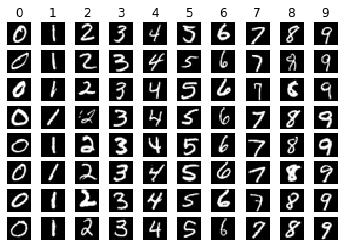

In [2]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

mnist_light = MNISTData('MNIST_Light/*/*.png')


x_train_l, x_test_l, y_train_l, y_test_l = mnist_light.get_data()

mnist_light.visualize_random()



## Import the MNIST dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


In [4]:
mnist = load_digits()
print("Imported ", len(mnist.data), " number of images from MNIST dataset")
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size = 0.3)

print("Split into a 70/30 ratio between train and test set")
print("Number of training data ", x_train.shape)
print("Number of test data ", x_test.shape)


Imported  1797  number of images from MNIST dataset
Split into a 70/30 ratio between train and test set
Number of training data  (1257, 64)
Number of test data  (540, 64)


## Setup MNIST Summarized

In [5]:
mnist_sum = load_digits()
x_train_sum, x_test_sum, y_train_sum, y_test_sum = train_test_split(mnist_sum.data, mnist_sum.target,test_size = 0.2)

for image in x_train_sum:
    light = image >= 12
    grey = [(pix > 5 and pix < 12) for pix in image]
    dark = image <= 5
    image[light] = 2
    image[grey] = 1
    image[dark] = 0

for image in x_test_sum:
    light = image >= 12
    grey = [pix > 5 and pix < 12 for pix in image]
    dark = image <= 5
    image[light] = 2
    image[grey] = 1
    image[dark] = 0

# Guassian NB Classifier
Make use of the provided Gaussian NB Classifier (sklearn.naive_bayes GaussianNB) for all data sets as a comparison. It is already implemented in the handout for the MNIST_Light set (see below).

In [6]:
from sklearn.naive_bayes import GaussianNB

### Using MNIST:

In [7]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
y_pred = gnb.predict(x_test)

In [9]:
print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test, y_pred))


Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.80      0.88      0.84        59
           2       0.95      0.65      0.77        55
           3       0.94      0.85      0.89        52
           4       1.00      0.74      0.85        53
           5       0.96      0.92      0.94        53
           6       0.95      0.98      0.96        54
           7       0.63      1.00      0.77        47
           8       0.61      0.77      0.68        57
           9       0.97      0.72      0.83        54

    accuracy                           0.85       540
   macro avg       0.88      0.85      0.85       540
weighted avg       0.88      0.85      0.85       540


Confusion matrix SKLearn GNB:
[[56  0  0  0  0  0  0  0  0  0]
 [ 0 52  1  0  0  0  0  1  4  1]
 [ 0  4 36  0  0  0  0  0 15  0]
 [ 0  0  1 44  0  0  0  3  4  0]
 [ 0  0  0  0 39  0  3  9  2  0]
 [ 0  1  0

### Using MNIST Summarized

In [10]:
gnb_sum = GaussianNB()
gnb_sum.fit(x_train_sum,y_train_sum)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
y_pred_sum = gnb_sum.predict(x_test_sum)

In [12]:
print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_sum, y_pred_sum)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_sum, y_pred_sum))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.39      0.56        36
           2       0.96      0.76      0.85        29
           3       0.93      0.66      0.77        41
           4       1.00      0.79      0.89        34
           5       0.86      0.50      0.63        38
           6       0.87      1.00      0.93        41
           7       0.69      0.97      0.80        38
           8       0.45      0.97      0.61        39
           9       0.67      0.53      0.59        30

    accuracy                           0.76       360
   macro avg       0.84      0.76      0.76       360
weighted avg       0.84      0.76      0.76       360


Confusion matrix SKLearn GNB:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  2  3 14  2]
 [ 0  0 22  0  0  0  0  0  7  0]
 [ 0  0  0 27  0  0  0  1 11  2]
 [ 0  0  0  0 27  0  1  5  1  0]
 [ 0  0  0

### Using MNIST_Light

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

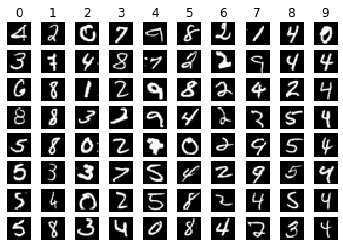

In [13]:
gnb = GaussianNB()
gnb.fit(x_train_l, y_train_l)
y_pred_l = gnb.predict(x_test_l)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(y_test_l, y_pred_l)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y_test_l, y_pred_l))

mnist_light.visualize_wrong_class(y_pred_l, 8)

# Nearest Centroid Classifier (NCC)

Implement your own Nearest Centroid Classifier (NCC): The NCC fit method should simply compute the mean values over the attribute values of the examples for each class. Prediction is then done by finding the argmin over the distances from the class centroids for each sample. This classifier should be run on all three variants of data sets, see below.

In [6]:
class NCC():
    
    def __init__(self):
        self.mu = []
        
        
    def fit(self, features, target):
        labels = np.unique(target)
        for label in labels:
            Ci = np.array(target == label)
            means = np.mean(features[Ci,:],axis = 0)
            self.mu.append(means)
            
    def predict(self, features):
        predictions = []
        for x in features:
#             print(np.linalg.norm(self.mu - x))
            yhat = np.argmin([np.linalg.norm(mu_i - x) for mu_i in self.mu])
            predictions.append(yhat)
        return predictions
        
        
        

### MNIST

In [8]:
ncc = NCC()
ncc.fit(x_train, y_train)
y_pred = ncc.predict(x_test)

print("Classification report own NCC:\n%s\n"
  % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix own NCC:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report own NCC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.80      0.76      0.78        49
           2       0.91      0.85      0.88        46
           3       0.98      0.86      0.92        66
           4       0.98      0.96      0.97        55
           5       0.89      0.89      0.89        53
           6       0.96      1.00      0.98        43
           7       0.92      0.97      0.94        59
           8       0.82      0.85      0.83        59
           9       0.82      0.93      0.87        60

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540


Confusion matrix own NCC:
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 37  3  0  0  1  1  0  7  0]
 [ 0  2 39  1  0  0  0  0  3  1]
 [ 0  1  0 57  0  1  0  3  1  3]
 [ 0  2  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 4

### MNIST summarized

In [9]:
ncc = NCC()
ncc.fit(x_train_sum, y_train_sum)
y_pred_sum = ncc.predict(x_test_sum)

print("Classification own NCC:\n%s\n"
  % (metrics.classification_report(y_test_sum, y_pred_sum)))
print("Confusion matrix own NCC:\n%s" % metrics.confusion_matrix(y_test_sum, y_pred_sum))

Classification own NCC:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.76      0.71      0.74        35
           2       0.89      0.91      0.90        34
           3       0.94      0.84      0.89        38
           4       1.00      0.89      0.94        35
           5       0.83      0.80      0.81        30
           6       0.93      0.98      0.95        41
           7       0.87      0.94      0.91        36
           8       0.92      0.81      0.86        43
           9       0.70      0.86      0.77        37

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360


Confusion matrix own NCC:
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 25  4  0  0  1  2  0  1  2]
 [ 0  1 31  1  0  0  0  0  1  0]
 [ 0  0  0 32  0  1  0  2  1  2]
 [ 0  3  0  0 31  0  0  1  0  0]
 [ 0  0  0  0  0 24  0  0

### MNIST Light

In [10]:
ncc = NCC()
ncc.fit(x_train_l, y_train_l)
y_pred_l = ncc.predict(x_test_l)

print("Classification report own NCC:\n%s\n"
  % (metrics.classification_report(y_test_l, y_pred_l)))
print("Confusion matrix own NCC:\n%s" % metrics.confusion_matrix(y_test_l, y_pred_l))

Classification report own NCC:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       164
           1       0.71      0.97      0.82       152
           2       0.84      0.73      0.78       155
           3       0.74      0.76      0.75       154
           4       0.75      0.76      0.75       143
           5       0.72      0.69      0.70       141
           6       0.90      0.86      0.88       143
           7       0.95      0.80      0.87       158
           8       0.79      0.72      0.75       132
           9       0.76      0.80      0.78       158

    accuracy                           0.80      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500


Confusion matrix own NCC:
[[150   0   2   0   0   6   3   1   2   0]
 [  0 148   0   0   0   2   0   0   2   0]
 [  0  15 113   8   2   3   3   1   8   2]
 [  1   5   8 117   1   7   1   2   8   4]
 [  1   4  

# Naive Bayesian Classifier (NBC)
Implement a Naive Bayesian Classifier (NBC) based on discrete (statistical) values (i.e., counts of examples falling into the different classes and attribute value groups) both for the priors and for the conditional probabilities. Run this on the two SciKitLearn digits data sets. It should also work with the (non-normalised) MNIST_Light set, but it will probably take a (very long) while and not give anything interesting really.

In [71]:
class NBC():
    def __init__(self):
        self.p_C = None
        self.p_XC = {}
        self.nb_classes = None
        self.nb_features = None
        
    def fit(self, x, y, nb_classes):
        self.nb_classes = nb_classes
        self.nb_features = x.shape[1]
        N = len(y)
        x_max = np.max(x)
        self.p_C = [sum(y == label)/N for label in range(nb_classes)]
        
        
        for label in range(nb_classes):
            self.p_XC[label] = {}
            class_idx = y==label
            class_features = x[class_idx]
            for j in range(self.nb_features):
                class_belong = []
                for i in range(int(x_max+1)):
                    class_belong.append(sum(class_features[:,j] == i))
                self.p_XC[label][j] = class_belong/sum(class_belong)
                
                
            
    
    def predict(self, features):
        predicts = []
        for x in features:
            bayes = []
            for label in range(self.nb_classes):
#                 print(self.p_XC[label][1][x[2]])
                mult= np.prod([self.p_XC[label][i][int(x[i])] for i in range(self.nb_features)])
                bayes.append(self.p_C[label]*mult)
            yhat = np.argmax(bayes)
            predicts.append(yhat)
        return predicts
        

### Using MNIST: 

In [76]:
nbc = NBC()
nb_classes = 10
nbc.fit(x_train, y_train, nb_classes)
y_pred = nbc.predict(x_test)



Predictions :  [0, 2, 0, 7, 4, 0, 8, 2, 3, 5, 8, 9, 0, 7, 0, 0, 0, 0, 1, 5]
Targets :  [2 2 9 7 4 0 1 2 3 5 8 9 0 3 2 1 0 2 1 5]


In [77]:
print("Predictions : ", y_pred[:20])
print("Targets : ", y_test[:20])

Predictions :  [0, 2, 0, 7, 4, 0, 8, 2, 3, 5, 8, 9, 0, 7, 0, 0, 0, 0, 1, 5]
Targets :  [2 2 9 7 4 0 1 2 3 5 8 9 0 3 2 1 0 2 1 5]


In [78]:
print("Classification report own NBC:\n%s\n"
  % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix own NBC:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report own NBC:
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        56
           1       1.00      0.61      0.76        59
           2       0.85      0.51      0.64        55
           3       1.00      0.54      0.70        52
           4       0.97      0.55      0.70        53
           5       0.90      0.72      0.80        53
           6       1.00      0.63      0.77        54
           7       0.91      0.62      0.73        47
           8       0.73      0.56      0.63        57
           9       0.82      0.69      0.75        54

    accuracy                           0.64       540
   macro avg       0.84      0.64      0.69       540
weighted avg       0.84      0.64      0.69       540


Confusion matrix own NBC:
[[56  0  0  0  0  0  0  0  0  0]
 [16 36  3  0  0  0  0  0  4  0]
 [24  0 28  0  0  0  0  0  2  1]
 [16  0  1 28  0  0  0  1  4  2]
 [23  0  0  0 29  0  0  1  0  0]
 [12  0  0  0  0 3

### Using MNIST summarized: 

In [80]:
nbc = NBC()
nb_classes = 10
nbc.fit(x_train_sum, y_train_sum, nb_classes)
y_pred_sum = nbc.predict(x_test_sum)

In [81]:
print("Classification report own NBC:\n%s\n"
  % (metrics.classification_report(y_test_sum, y_pred_sum)))
print("Confusion matrix own NBC:\n%s" % metrics.confusion_matrix(y_test_sum, y_pred_sum))

Classification report own NBC:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.82      0.92      0.87        36
           2       0.97      0.97      0.97        29
           3       0.92      0.88      0.90        41
           4       0.94      0.85      0.89        34
           5       0.86      0.82      0.84        38
           6       1.00      0.90      0.95        41
           7       0.90      0.92      0.91        38
           8       0.82      0.79      0.81        39
           9       0.76      0.83      0.79        30

    accuracy                           0.88       360
   macro avg       0.88      0.89      0.88       360
weighted avg       0.89      0.88      0.88       360


Confusion matrix own NBC:
[[33  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  3]
 [ 1  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  2  0  1  2  0]
 [ 2  1  0  0 29  0  0  1  1  0]
 [ 0  1  0  0  0 3

# Gaussian Naive Bayesian Classifier (GNB)
Implement your own Gaussian Naive Bayesian Classifier (GNB) (assume priors for the classes based on counts and Gaussian distributions for the conditional probabilities) and make sure it works for all three data sets. You will most likely encounter problems due to the edge pixels having value 0.0 in practically ALL images in ALL data sets. A workaround is to add an epsilon to the variance. Why is that still working?

In [65]:
class GNB():
    
    def __init__(self, epsilon = 1e-5):
        self.p_C = None
        self.nb_classes = None
        self.nb_features = None
#         self.p_XC = {}
        self.mu = {}
        self.std = {}
        self.eps = epsilon
    
    def fit(self,x,y,nb_classes):
        self.nb_features = x.shape[1]
        self.nb_classes = nb_classes
        N = len(y)
        x_max = np.max(x)
        
        self.p_C = [sum(y == label)/N for label in range(nb_classes)]    # Calculates the class probabilities
        
        # Calculate the means and std for each class
        for label in range(nb_classes):
            Ci = np.array(y == label)
            means = np.mean(x[Ci,:],axis = 0)
            std = np.std(x[Ci,:],axis = 0)
            self.mu[label] = means
            self.std[label] = std
        
        
        # Calculate the conditional probabilities
#         for label in range(nb_classes):
#             self.p_XC[label] = {}
#             class_idx = y==label
#             class_features = x[class_idx]
#             for j in range(self.nb_features):
#                 class_belong = []
#                 for i in range(int(x_max+1)):
#                     gauss = np.exp(-(class_features[:,j] - self.mu[j])) # TODO:...
#                     class_belong.append(prob)
#                 self.p_XC[label][j] = class_belong
        
    
    def predict(self,features):
        predictions = []
        for x in features:
            bayes = []
            for label in range(self.nb_classes):
                mult= sum([-1/2*np.log(2*np.pi*self.std[label][i]**2+self.eps)-((x[i]-self.mu[label][i])**2)/(np.sqrt(2*self.std[label][i]**2)+self.eps)
                                for i in range(self.nb_features)])
                
                bayes.append(np.log(self.p_C[label])+mult)
            yhat = np.argmax(bayes)
            predictions.append(yhat)
        return predictions

### Using MNIST : 

In [66]:
nbc = GNB()
nb_classes = 10
nbc.fit(x_train, y_train, nb_classes)
y_pred = nbc.predict(x_test)

In [67]:
print("Predictions : ", y_pred[:20])
print("Targets : ", y_test[:20])

Predictions :  [1, 0, 3, 7, 7, 7, 0, 7, 1, 3, 6, 8, 1, 2, 6, 3, 7, 2, 1, 3]
Targets :  [1 0 3 7 7 7 0 7 1 3 6 8 8 2 6 3 7 2 1 3]


In [68]:
print("Classification report own GNB:\n%s\n"
  % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix own GNB:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report own GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.85      0.89      0.87        62
           2       0.96      0.83      0.89        54
           3       1.00      0.87      0.93        55
           4       0.94      0.96      0.95        50
           5       0.95      0.92      0.93        61
           6       1.00      1.00      1.00        50
           7       0.86      1.00      0.93        50
           8       0.73      0.81      0.77        54
           9       0.81      0.80      0.80        49

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540


Confusion matrix own GNB:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  2  5]
 [ 0  2 45  0  0  0  0  0  7  0]
 [ 0  0  1 48  0  0  0  0  5  1]
 [ 0  0  0  0 48  0  0  2  0  0]
 [ 0  0  0  0  1 5

### Using MNIST summarized

In [69]:
nbc = GNB()
nb_classes = 10
nbc.fit(x_train_sum, y_train_sum, nb_classes)
y_pred_sum = nbc.predict(x_test_sum)

In [70]:
print("Classification report own GNB:\n%s\n"
  % (metrics.classification_report(y_test_sum, y_pred_sum)))
print("Confusion matrix own GNB:\n%s" % metrics.confusion_matrix(y_test_sum, y_pred_sum))

Classification report own GNB:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.95      0.49      0.64        39
           2       0.95      0.78      0.86        27
           3       0.76      0.84      0.79        37
           4       0.90      0.75      0.82        36
           5       0.96      0.71      0.81        34
           6       0.70      0.97      0.81        40
           7       0.66      0.95      0.78        41
           8       0.63      0.93      0.75        42
           9       0.94      0.44      0.60        36

    accuracy                           0.78       360
   macro avg       0.84      0.78      0.78       360
weighted avg       0.83      0.78      0.77       360


Confusion matrix own GNB:
[[26  0  0  1  1  0  0  0  0  0]
 [ 0 19  1  0  0  0  8  3  7  1]
 [ 0  0 21  1  0  0  1  0  4  0]
 [ 0  0  0 31  0  0  1  1  4  0]
 [ 0  0  0  0 27  0  3  6  0  0]
 [ 1  0  0  0  0 2

### Using MNIST Light

In [71]:
nbc = GNB()
nb_classes = 10
nbc.fit(x_train_l, y_train_l, nb_classes)
y_pred_l = nbc.predict(x_test_l)

In [72]:
print("Classification report own GNB:\n%s\n"
  % (metrics.classification_report(y_test_l, y_pred_l)))
print("Confusion matrix own GNB:\n%s" % metrics.confusion_matrix(y_test_l, y_pred_l))

Classification report own GNB:
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       164
           1       0.29      0.98      0.44       152
           2       0.45      0.03      0.06       155
           3       0.75      0.18      0.28       154
           4       0.75      0.04      0.08       143
           5       1.00      0.01      0.01       141
           6       0.64      0.76      0.70       143
           7       0.84      0.43      0.57       158
           8       0.35      0.27      0.30       132
           9       0.44      0.74      0.55       158

    accuracy                           0.44      1500
   macro avg       0.60      0.43      0.36      1500
weighted avg       0.60      0.44      0.37      1500


Confusion matrix own GNB:
[[149   5   2   1   1   0   1   0   4   1]
 [  0 149   1   0   0   0   0   1   1   0]
 [ 34  49   5   6   0   0  42   2  10   7]
 [ 45  59   1  27   0   0   1   5   7   9]
 [ 18  55  